In [ ]:
"""
http://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py
"""

In [132]:


from sklearn import datasets, svm, metrics

import matplotlib.image as mpimg


import scipy as sp
import matplotlib.pyplot as plt

from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time
import pandas as pd
import random


%matplotlib inline  


    
class Img:
    """ Img object (now only use for maker) """
    def __init__(self, species, index, n_colors, cropx = 300, cropy = 300):
        self.species = species   # e.g., "cp"
        self.index = index       # e.g 0, 1, 2
        self.n_colors = n_colors
        self.img = mpimg.imread('img/' + species + str(index) + '.png')[:cropx,:cropy,:3]
        self.w, self.h, self.d = tuple(self.img.shape)
        self.img2d = np.reshape(self.img, (w * h, 3)) 
        self.get_img_sorted()    # sorted and clustered by kmean
        self.get_img_reduced()   # reduced to less color
        
    def get_img_sorted(self):
        kmeans = KMeans(n_clusters=self.n_colors)
        kmeans.fit(self.img2d)

        values = kmeans.cluster_centers_.squeeze()
        labels = kmeans.labels_

        self.df_img2d_w_cluster = pd.DataFrame(self.img2d, columns=("r", "g", "b"))
        self.df_img2d_w_cluster['cluster'] = labels
    
        self.img2d_sorted = self.df_img2d_w_cluster.sort_values(by=['cluster'])[['r', 'g', 'b']].values
        self.img_sorted = self.img2d_sorted.reshape((self.w, self.h, self.d))
        
    def get_img_reduced(self):
        dfg = self.df_img2d_w_cluster.groupby("cluster") \
        .agg({ 'cluster':'size', 'r':'mean', 'g':'mean', 'b':'mean'}) \
        .rename(columns={'cluster':'count', 'r':'r', 'g':'g', 'b':'b'}) \
        .reset_index()
        
        # dict connect clusterID to rgbs
        cluster2rgb = dfg.T.to_dict()
 
        # convert colour
        self.df_img2d_changed = self.df_img2d_w_cluster.ix[:]

        for i in range(0, n_colors):
            self.df_img2d_changed.r[self.df_img2d_changed.cluster == i] = cluster2rgb[i]['r']
            self.df_img2d_changed.g[self.df_img2d_changed.cluster == i] = cluster2rgb[i]['g']
            self.df_img2d_changed.b[self.df_img2d_changed.cluster == i] = cluster2rgb[i]['b']

        self.img2d_changed = self.df_img2d_changed.values[:,:3]
        self.img_changed = self.img2d_changed.reshape((self.w, self.h, self.d))
    
    def show(self):
        plt.subplot(1, 1, 1)
        plt.axis('off')
        plt.imshow(self.img, cmap=plt.cm.gray_r, interpolation='nearest')
    

    
    
    
    

In [133]:
# number of images
n = 3

# color reduced to n_colors
n_colors = 3


/Users/haiwang/anaconda3/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/haiwang/anaconda3/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/haiwang/anaconda3/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


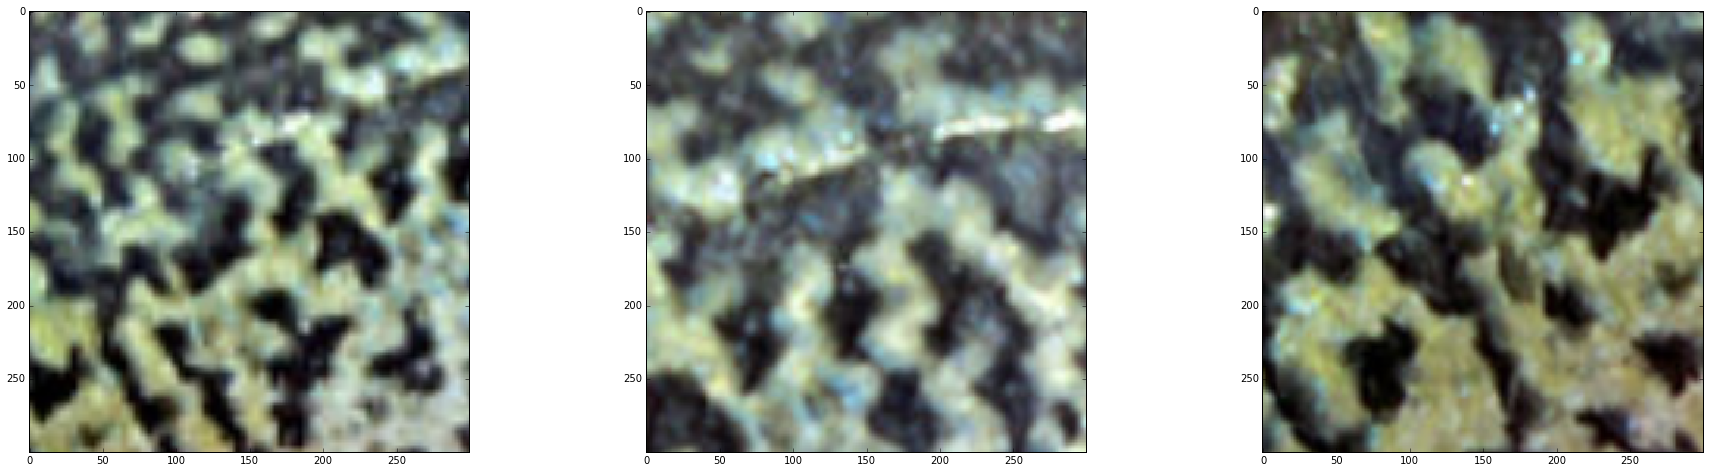

In [134]:
# original images
fig = plt.figure(figsize=(30, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)


for i in range(0, n):
    ax = fig.add_subplot(1, n, i + 1)
    ax.imshow(Img("cp", i, 3).img, cmap=plt.cm.gray_r, interpolation='nearest')
        

/Users/haiwang/anaconda3/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/haiwang/anaconda3/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/haiwang/anaconda3/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


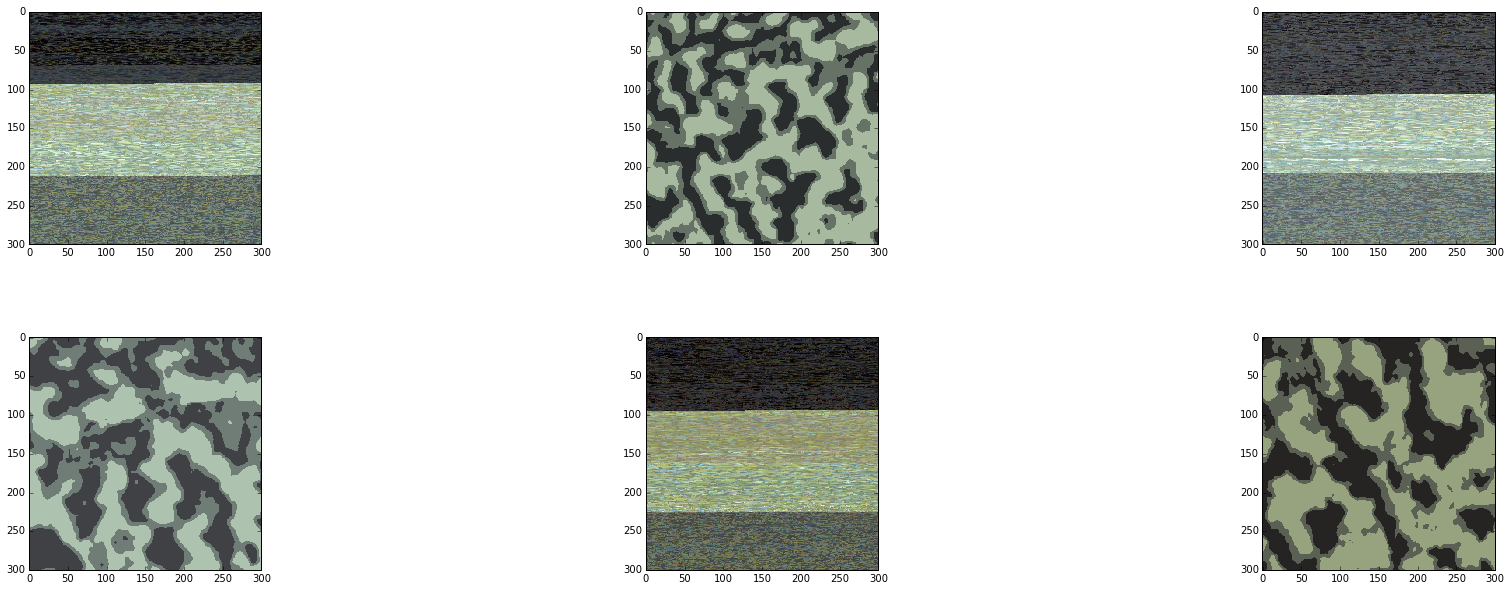

In [135]:
# kmean
fig = plt.figure(figsize=(30, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

panel = 1
for i in range(0, n):
    m = Img("cp", i, n_colors)
    
    ax = fig.add_subplot(2, n, panel)
    panel += 1
    ax.imshow(m.img_sorted, cmap=plt.cm.gray_r, interpolation='nearest')
    

    ax = fig.add_subplot(2, n, panel)
    panel += 1
    ax.imshow(m.img_changed, cmap=plt.cm.gray_r, interpolation='nearest')
    


In [110]:
img2d_sorted

array([[ 0.64313728,  0.70588237,  0.62352943],
       [ 0.52549022,  0.58039218,  0.60392159],
       [ 0.49803922,  0.5529412 ,  0.57647061],
       ..., 
       [ 0.29803923,  0.28235295,  0.28627452],
       [ 0.42352942,  0.52941179,  0.55686277],
       [ 0.89411765,  0.94901961,  0.81176472]], dtype=float32)

In [ ]:

fig = plt.figure(figsize=(30, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)


# find the average rgb each cluster
dfg = df_img2d_w_cluster.groupby("cluster") \
.agg({ 'cluster':'size', 'r':'mean', 'g':'mean', 'b':'mean'}) \
.rename(columns={'cluster':'count', 'r':'r', 'g':'g', 'b':'b'}) \
.reset_index()

cluster2rgb = dfg.T.to_dict()


# convert colour
df_img2d_w_cluster_change = df_img2d_w_cluster.ix[:]

for i in range(0, n_colors):
    df_img2d_w_cluster_change.r[df_img2d_w_cluster_change.cluster == i] = cluster2rgb[i]['r']
    df_img2d_w_cluster_change.g[df_img2d_w_cluster_change.cluster == i] = cluster2rgb[i]['g']
    df_img2d_w_cluster_change.b[df_img2d_w_cluster_change.cluster == i] = cluster2rgb[i]['b']

img2d_w_cluster_change = df_img2d_w_cluster_change.values[:,:3]

# show blurred picture
show_image(img2d_w_cluster_change.reshape((w, h, d)))





/Users/haiwang/anaconda3/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/haiwang/anaconda3/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/haiwang/anaconda3/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


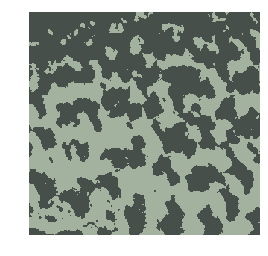

In [22]:
# find the average rgb each cluster
dfg = df_img2d_w_cluster.groupby("cluster") \
.agg({ 'cluster':'size', 'r':'mean', 'g':'mean', 'b':'mean'}) \
.rename(columns={'cluster':'count', 'r':'r', 'g':'g', 'b':'b'}) \
.reset_index()

cluster2rgb = dfg.T.to_dict()


# convert colour
df_img2d_w_cluster_change = df_img2d_w_cluster.ix[:]

for i in range(0, n_colors):
    df_img2d_w_cluster_change.r[df_img2d_w_cluster_change.cluster == i] = cluster2rgb[i]['r']
    df_img2d_w_cluster_change.g[df_img2d_w_cluster_change.cluster == i] = cluster2rgb[i]['g']
    df_img2d_w_cluster_change.b[df_img2d_w_cluster_change.cluster == i] = cluster2rgb[i]['b']

img2d_w_cluster_change = df_img2d_w_cluster_change.values[:,:3]

# show blurred picture
show_image(img2d_w_cluster_change.reshape((w, h, d)))



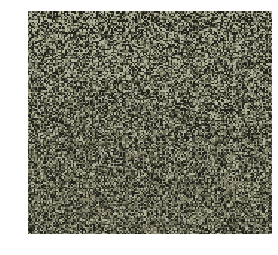

In [116]:
# shuffle 
random.shuffle(img2d)

show_image(img2d.reshape((w, h, d)))

done in 0.287s.
Predicting color indices on the full image (k-means)
done in 0.020s.
Predicting color indices on the full image (random)
done in 0.015s.


In [119]:
img.shape

(151, 164, 3)

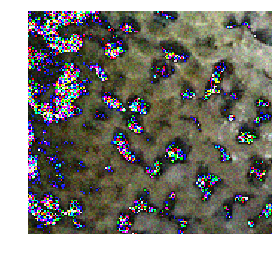

In [126]:
img2 = img - np.random.rand(151,164,3)/5

show_image(img2)

164